<a href="https://colab.research.google.com/github/johnjustine5646/Lab2_ML/blob/main/2348522_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#reading the dataset
df = pd.read_csv('/content/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
#checking for null values
df.isnull().sum()  #no null values

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df2=df.drop(columns=['Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling', 'Checkin service', 'Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes'])
df2.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
for col in df2.columns:
  le=LabelEncoder()
  df2['Gender']=le.fit_transform(df2['Gender'])

In [8]:
for col in df2.columns:
  le=LabelEncoder()
  df2['satisfaction']=le.fit_transform(df2['satisfaction'])

In [9]:
for col in df2.columns:
  le=LabelEncoder()
  df2['Customer Type']=le.fit_transform(df2['Customer Type'])

In [10]:
df2_age=df2['Age'].copy()
bins=[0,18,26,36,46,56]
labels=['0-18','18-25','26-35','36-45','46+']
df2_age['age_bin']=pd.cut(df2['Age'],bins=bins,labels=labels,duplicates='drop')
age_counts = df2_age["age_bin"].value_counts()

<Axes: >

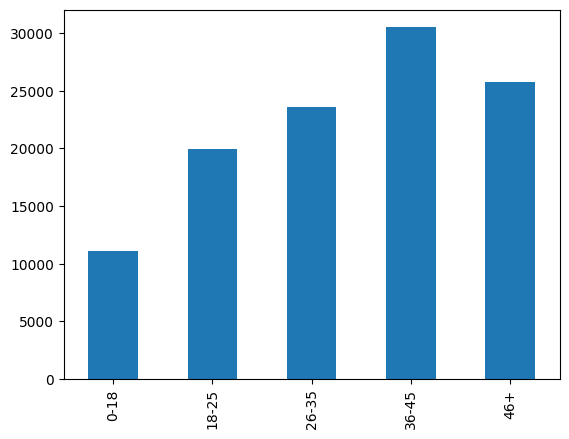

In [11]:
#Age binning
df2_age['age_bin'].value_counts(sort=False).plot(kind='bar')


In [12]:
import scipy.stats as stats

In [13]:
contingency_table = pd.crosstab(df2_age["age_bin"], df2["satisfaction"])

# Print the contingency table
print(contingency_table)

# Calculate the chi-square statistic
chi_square_statistic, p_value, df_value, expected_values = stats.chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print(chi_square_statistic, p_value)

# If the p-value is less than 0.05, then there is a significant relationship between age_bin and satisfaction
if p_value < 0.05:
    print("There is a significant relationship between age_bin and satisfaction")
else:
    print("There is no significant relationship between age_bin and satisfaction")

satisfaction      0      1
Age                       
0-18           6311   4759
18-25         11093   8832
26-35         12366  11251
36-45         11711  18810
46+            8683  17095
3949.1646794002477 0.0
There is a significant relationship between age_bin and satisfaction


In [14]:
covariance_matrix = np.cov(df2['Age'],df2['satisfaction'])
# Print the covariance matrix
print(covariance_matrix)
#strong positive relationship

[[228.59504531   0.88782521]
 [  0.88782521   0.24776194]]


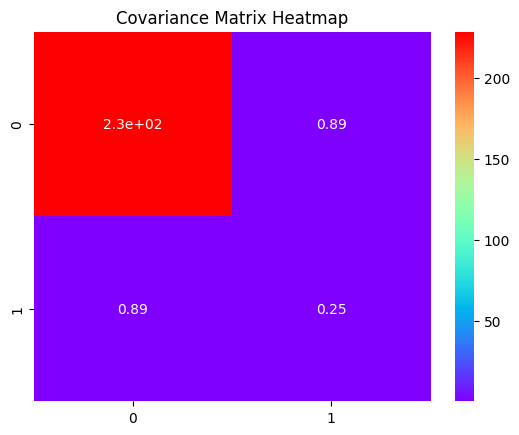

In [15]:
sns.heatmap(covariance_matrix, cmap="rainbow", annot=True)
plt.title("Covariance Matrix Heatmap")
plt.show()

In [16]:
# Create a contingency table of gender and customer loyalty
contingency_table2 = pd.crosstab(df2["Gender"], df2["Customer Type"])

# Calculate the chi-square statistic and p-value
chi_square_statistic, p_value, df_value, expected_values = stats.chi2_contingency(contingency_table2)

# Print the chi-square statistic and p-value
print(chi_square_statistic, p_value)

124.31296490721579 7.195128694737902e-29


In [27]:
grouped = df2.groupby(['Gender', 'Customer_Type']).size().unstack(fill_value=0)

# Creating the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(gender_categories, grouped, label='Loyal', color='blue')
plt.bar(gender_categories, disloyal_counts, bottom=loyal_counts, label='Disloyal', color='orange')
plt.title('Gender and Customer Type Relationship')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.annotate(f'Chi-Square: {chi_square_value:.2f}\nP-Value: {p_value:.2e}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             fontsize=12, ha='center', va='center', color='red')
plt.legend()

# Display the plot
plt.show()


KeyError: ignored